In [1]:
from sklearn.svm import SVC, SVR, NuSVC, LinearSVC
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, ReLU, Add, GlobalAveragePooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout, MaxPooling1D



In [2]:
def add_gaussian_noise(data, mean=0, std_dev=4):
    noise = np.random.normal(mean, std_dev, data.shape)
    noisy_data = data + noise
    return noisy_data

In [3]:
def downsample(data):
  return data[:, ::2, :]

In [4]:
# Path to the folder containing Normal condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\Normal'

# List to store all Normal CSV data
normal_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'Normal_{i}.csv')
    df = pd.read_csv(file_path)
    normal_data.append(df.values)  # Convert DataFrame to NumPy array

# Path to the folder containing AddWeight condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\AddWeight'

# List to store all AddWeight CSV data
add_weight_dta = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'AddWeight_{i}.csv')
    df = pd.read_csv(file_path)
    add_weight_dta.append(df.values)

# Path to the folder containing PropellerDamage_slight CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_slight'

# List to store all PropellerDamage_slight data
PropellerDamage_slight_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PropellerDamage_slight_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_slight_data.append(df.values)

# Path to the folder containing PropellerDamage_bad CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_bad'

# List to store all PropellerDamage_bad data
PropellerDamage_bad_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PropellerDamage_bad_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_bad_data.append(df.values)

# Path to the folder containing PressureGain_constant CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PressureGain_constant'

# List to store all PressureGain_constant data
PressureGain_constant_data = []

# Read and append each CSV file to the list
for i in range(50):
    file_path = os.path.join(folder_path, f'PressureGain_constant_{i}.csv')
    df = pd.read_csv(file_path)
    PressureGain_constant_data.append(df.values)

# Concatenate all CSV file data into one large NumPy array per class
normal = np.concatenate(normal_data, axis=0)
add_weight = np.concatenate(add_weight_dta, axis=0)
PropellerDamage_slight = np.concatenate(PropellerDamage_slight_data, axis=0)
PropellerDamage_bad = np.concatenate(PropellerDamage_bad_data, axis=0)
PressureGain_constant = np.concatenate(PressureGain_constant_data, axis=0)


In [5]:
# Path to the folder containing Normal condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\Normal'

# List to store all Normal CSV data
normal_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'Normal_{i}.csv')
    df = pd.read_csv(file_path)
    normal_data.append(df.values)

# Path to the folder containing AddWeight condition CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\AddWeight'

# List to store all AddWeight CSV data
add_weight_dta = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'AddWeight_{i}.csv')
    df = pd.read_csv(file_path)
    add_weight_dta.append(df.values)

# Path to the folder containing PropellerDamage_slight CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_slight'

# List to store all PropellerDamage_slight data
PropellerDamage_slight_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'PropellerDamage_slight_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_slight_data.append(df.values)

# Path to the folder containing PropellerDamage_bad CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PropellerDamage_bad'

# List to store all PropellerDamage_bad data
PropellerDamage_bad_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'PropellerDamage_bad_{i}.csv')
    df = pd.read_csv(file_path)
    PropellerDamage_bad_data.append(df.values)

# Path to the folder containing PressureGain_constant CSV files
folder_path = 'E:\\ICF\\fault diagnoosis\\Dataset\\train\\PressureGain_constant'

# List to store all PressureGain_constant data
PressureGain_constant_data = []

# Read and append each CSV file to the list
for i in range(30):
    file_path = os.path.join(folder_path, f'PressureGain_constant_{i}.csv')
    df = pd.read_csv(file_path)
    PressureGain_constant_data.append(df.values)

# Concatenate all CSV file data into one large NumPy array per class
normal_test = np.concatenate(normal_data, axis=0)
add_weight_test = np.concatenate(add_weight_dta, axis=0)
PropellerDamage_slight_test = np.concatenate(PropellerDamage_slight_data, axis=0)
PropellerDamage_bad_test = np.concatenate(PropellerDamage_bad_data, axis=0)
PressureGain_constant_test = np.concatenate(PressureGain_constant_data, axis=0)


In [6]:
# Merge  data from all classes into a single dataset
data = np.concatenate((normal, add_weight, PropellerDamage_slight, PropellerDamage_bad, PressureGain_constant))

# Create corresponding labels for each class
labels_normal = np.zeros(normal.shape[0])
labels_add = np.ones(add_weight.shape[0])
labels_slight = np.full(PropellerDamage_slight.shape[0], 2)
labels_bad = np.full(PropellerDamage_bad.shape[0], 3)
labels_pressure = np.full(PressureGain_constant.shape[0], 4)

# Concatenate all label arrays into a single label vector
labels = np.concatenate([
    labels_normal,
    labels_add,
    labels_slight,
    labels_bad,
    labels_pressure
])

# Print the shapes of the final dataset and label array
print("shape of fft_data:", data.shape)
print("shape of labels:", labels.shape)


shape of fft_data: (49302, 17)
shape of labels: (49302,)


In [7]:
testx = np.concatenate((normal_test, add_weight_test, PropellerDamage_slight_test, PropellerDamage_bad_test, PressureGain_constant_test))
labels_normal = np.zeros(normal_test.shape[0])
labels_add = np.ones(add_weight_test.shape[0])
labels_slight = np.full(PropellerDamage_slight_test.shape[0], 2)
labels_bad = np.full(PropellerDamage_bad_test.shape[0], 3)
labels_pressure = np.full(PressureGain_constant_test.shape[0], 4)
ylabels = np.concatenate([
    labels_normal,
    labels_add,
    labels_slight,
    labels_bad,
    labels_pressure
])

In [8]:
# Split the data into training and validation sets with stratified sampling
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, stratify=labels, random_state=42)

# Apply Gaussian noise to training and validation sets
X_train = add_gaussian_noise(X_train)
X_val = add_gaussian_noise(X_val)

# Standardize the datasets using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)
X_test = scaler.transform(testx.reshape(-1, testx.shape[-1])).reshape(testx.shape)
y_test = ylabels

# Define a function to add Gaussian noise
def add_gaussian_noise(data, mean=0, std_dev=0.1):
    noise = np.random.normal(mean, std_dev, data.shape)
    return data + noise

# Add small Gaussian noise to training and validation sets after standardization
X_train = add_gaussian_noise(X_train, std_dev=0.03)
X_val = add_gaussian_noise(X_val, std_dev=0.03)

# Reshape the input data to fit LSTM input shape: (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], 17, 1))
X_val = X_val.reshape((X_val.shape[0], 17, 1))
X_test = X_test.reshape((X_test.shape[0], 17, 1))

# Print the shapes of the processed datasets
print("shape X_train", X_train.shape, "shape X_val", X_val.shape)
print("shape y_train", y_train.shape, "shape y_val", y_val.shape)


shape X_train (39441, 17, 1) shape X_val (9861, 17, 1)
shape y_train (39441,) shape y_val (9861,)


In [9]:
print(f"Shapes - Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Shapes - Train: (39441, 17, 1), Val: (9861, 17, 1), Test: (29601, 17, 1)


## Resnet structure

In [10]:
# ResNet block
def resnet_block(x, filters, kernel_size, stride=1):
    shortcut = x
    x = Conv1D(filters, kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv1D(filters, kernel_size, padding='same')(x)
    x = BatchNormalization()(x)

    # If stride changes, the shortcut must be adjusted accordingly
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = Conv1D(filters, 1, strides=stride, padding='same')(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x


In [11]:
def build_deep_resnet(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    
    x = Conv1D(64, 7, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling1D(pool_size=2)(x)

    x = resnet_block(x, 32, 3)
    x = resnet_block(x, 32, 3)

    x = resnet_block(x, 64, 3, stride=2)
    x = resnet_block(x, 64, 3)

    x = resnet_block(x, 128, 3, stride=2)
    x = resnet_block(x, 128, 3)

    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs)

In [12]:
# Define and compile the model
input_shape = (17,1)
num_classes = 5
model = build_deep_resnet(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_accuracy', save_best_only=True)


In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 17, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 17, 64)    │        512 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 17, 64)    │        256 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 17, 64)    │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 8, 64)     │          0 │ re_lu[0][0]       │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 8, 32)     │      6,176 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 32)     │        128 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 8, 32)     │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 8, 32)     │      3,104 │ re_lu_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 8, 32)     │      2,080 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 32)     │        128 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 32)     │        128 │ conv1d_3[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 8, 32)     │          0 │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 8, 32)     │          0 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 8, 32)     │      3,104 │ re_lu_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 32)     │        128 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 8, 32)     │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 8, 32)     │      3,104 │ re_lu_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 32)     │        128 │ conv1d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 8, 32)     │          0 │ batch_normalizat… │
│                     │                   │            │ re_lu_2[0][0]   

 Total params: 249,701 (975.39 KB)

 Trainable params: 247,333 (966.14 KB)

 Non-trainable params: 2,368 (9.25 KB)

In [14]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))



In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64,
          validation_data=(X_val, y_val),
          class_weight=class_weights_dict,
          callbacks=[ModelCheckpoint('best_model.keras', save_best_only=True), early_stop])


Epoch 1/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 27s 25ms/step - accuracy: 0.5037 - loss: 1.2623 - val_accuracy: 0.6532 - val_loss: 0.7895
Epoch 2/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6628 - loss: 0.7948 - val_accuracy: 0.6859 - val_loss: 0.7360
Epoch 3/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6827 - loss: 0.7402 - val_accuracy: 0.6924 - val_loss: 0.7094
Epoch 4/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.7033 - loss: 0.6967 - val_accuracy: 0.6993 - val_loss: 0.6959
Epoch 5/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7150 - loss: 0.6753 - val_accuracy: 0.7033 - val_loss: 0.6903
Epoch 6/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.7258 - loss: 0.6498 - val_accuracy: 0.7142 - val_loss: 0.6797
Epoch 7/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7365 - loss: 0.6278 - val_accuracy: 0.7207 - val_loss: 0.6648
Epoch 8/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.7408 - loss: 0

In [17]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

926/926 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8312 - loss: 0.4001
Test accuracy: 0.8136549592018127


926/926 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step


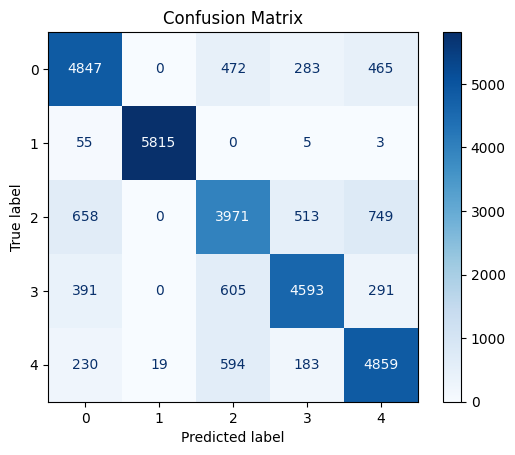

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


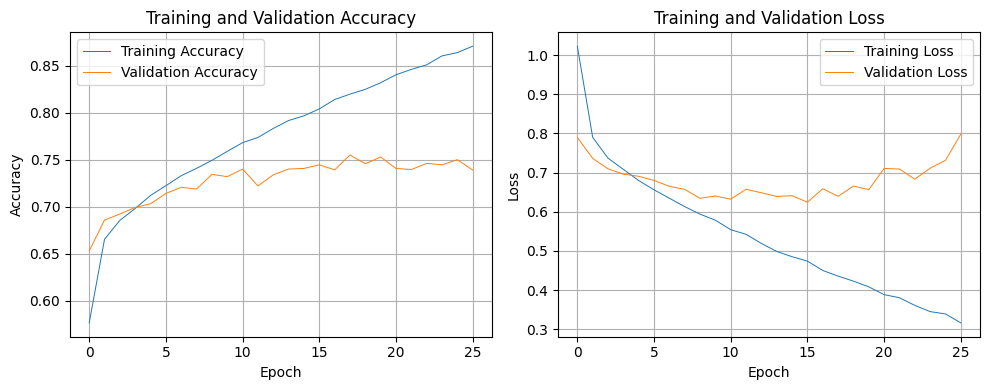

In [19]:

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, linewidth=0.7, label='Training Accuracy')
plt.plot(val_accuracy, linewidth=0.7, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, linewidth=0.7, label='Training Loss')
plt.plot(val_loss, linewidth=0.7, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [52]:
# Report of classification
print(classification_report(y_test, y_pred_classes, target_names=[
    'Normal', 
    'AddWeight', 
    'PropellerDamage_slight', 
    'PropellerDamage_bad', 
    'PressureGain_constant'
]))

                        precision    recall  f1-score   support

                Normal       0.39      0.76      0.52       200
             AddWeight       0.63      0.45      0.52       200
PropellerDamage_slight       0.38      0.47      0.42       200
   PropellerDamage_bad       0.30      0.27      0.28       200
 PressureGain_constant       0.73      0.17      0.27       200

              accuracy                           0.42      1000
             macro avg       0.49      0.42      0.40      1000
          weighted avg       0.49      0.42      0.40      1000

